In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from datetime import datetime as dt
from plotly import graph_objects as go
import plotly.express as px



In [322]:

from io import BytesIO
import requests
spreadsheet_id = '1OdjccfGlv3lsuiWgIAHbE8id91FpVaU2EsaZo5kknaA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
train = pd.read_csv(BytesIO(r.content))


In [323]:
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())  

In [324]:
get_info(train)

Head:


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


None


Description of quantitative parameters:


,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000



Description of categorical parameters:


,MMM-YY,Gender,City,Education_Level,Dateofjoining,LastWorkingDate
count,19104,19104,19104,19104,19104,1616
unique,24,2,29,3,869,493
top,2016-01-01,Male,C20,Bachelor,2012-07-23,2017-07-29
freq,1022,11103,1008,6864,192,70



Columns with NaN values:


MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64


Shape:


(19104, 13)


Number of duplicated rows:


0

### Change data types

In [325]:
train['Emp_ID']=train['Emp_ID'].astype('category')
train['Gender']=train['Gender'].astype('category')
train['City']=train['City'].astype('category')
train['Education_Level']=train['Education_Level'].astype('category')

train['date'] = pd.to_datetime(train['MMM-YY'], format='%Y-%m-%d')

In [326]:
# train['LastWorkingDate'].count()/len(train['Emp_ID'].unique())

## Add 'left' column: True for those who left the company


In [327]:
# train.pivot_table(index='Emp_ID', values={'Salary'}, columns='')

In [328]:
def mapper(row):
  if pd.isna(row['LastWorkingDate']):
    return False
  return True


In [329]:
train['churn'] = train.apply(mapper, axis=1)


In [330]:
train_churn = train.query('churn == True')

In [331]:
emp_churn = train_churn['Emp_ID'].unique()

In [332]:
def mapper_left(row):
  if row['Emp_ID'] in emp_churn:
    return True
  return False

train['left'] = train.apply(mapper_left, axis=1)
# emp_churn = train_churn['Emp_ID'].unique()

In [333]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,date,churn,left
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2016-01-01,False,True
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2016-02-01,False,True
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-01,True,True
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-11-01,False,False
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-01,False,False


In [334]:
train=train.drop(labels='churn', axis=1)


### Add numerical categories to analyze gender, education level 

In [335]:
train['Education_Level'].value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [336]:
# education_dict={1: 'College', 2: 'Bachelor', 3: 'Master'}
education_dict={'College': 1,'Bachelor':2, 'Master':3}

def education_mapper(row):
  return education_dict.get(row['Education_Level'])

train['Education_category']=train.apply(education_mapper, axis=1)

train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,date,left,Education_category
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2016-01-01,True,3
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2016-02-01,True,3
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-01,True,3
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-11-01,False,3
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-01,False,3


In [337]:
gender_dict={'Male': 0,'Female':1}

def gender_mapper(row):
  return gender_dict.get(row['Gender'])

train['Gender_category']=train.apply(gender_mapper, axis=1)

train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,date,left,Education_category,Gender_category
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,2016-01-01,True,3,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,2016-02-01,True,3,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,2016-03-01,True,3,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-11-01,False,3,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,2017-12-01,False,3,0


### How many entries are there for each employee?

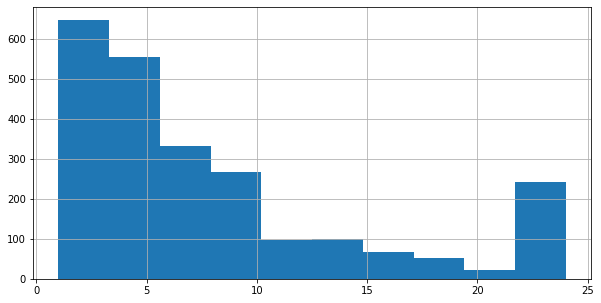

In [338]:
train.groupby('Emp_ID')['left'].count().hist(figsize=(10,5))

There are around 200 employees with more than 20 entries

## Let's check different features for employees who left and stayed

### Let's create a table with one entry per employee and check quantitative features

In [339]:
train_pivot=train.pivot_table(index={'Emp_ID', 'left'}, values={'Age', 'Salary', 'Joining Designation', 'Designation', 'Total Business Value',	'Quarterly Rating', 'Education_category', 'Gender_category'}, aggfunc='mean')

In [340]:
train_pivot.head()

Age  Designation  ...    Salary  Total Business Value
left  Emp_ID                          ...                                
False 2       31.000000          2.0  ...   67016.0          0.000000e+00
      6       31.000000          3.0  ...   78728.0          2.530000e+05
      11      28.000000          1.0  ...   42172.0          0.000000e+00
      14      39.000000          3.0  ...   19734.0          0.000000e+00
      25      29.666667          3.0  ...  102077.0          1.514630e+06

[5 rows x 8 columns]

In [341]:
train_pivot = train_pivot.reset_index()

In [342]:
def plot_graphs(df, feature):
  fig = px.histogram(df, x=feature, color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
  fig.show()

  fig = px.box(df, y=feature, color_discrete_sequence=px.colors.qualitative.Pastel)
  fig.show()

### Age

In [343]:
plot_graphs(train_pivot, 'Age')

### Designation

In [344]:
plot_graphs(train_pivot, 'Joining Designation')

In [345]:
plot_graphs(train_pivot, 'Designation')

### Quarterly Rating

In [346]:
plot_graphs(train_pivot, 'Quarterly Rating')

### Salary

In [347]:
plot_graphs(train_pivot, 'Salary')

### Total Business Value

In [348]:
plot_graphs(train_pivot, 'Total Business Value')

### Gender

In [349]:
# fig = px.histogram(train, x='Gender', color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
# fig.show()

### City

In [350]:
# fig = px.histogram(train, x='City', color='left', title=' ', color_discrete_sequence=px.colors.qualitative.Pastel)
# fig.show()

### Education level

## Look at the mean feature values in two groups: for those who left and for those who stayed.

In [351]:
features_mean = train.groupby('left').mean()
features_mean

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Education_category,Gender_category
left,,,,,,,,
False,35.608233,73224.143968,1.682218,2.482905,841598.528302,2.441624,2.012007,0.418982
True,33.841587,59259.691959,1.697558,2.058307,343783.487788,1.643595,2.029829,0.418670


Those, who left the company:
- were yonger
- had smaller salary
- lower designation
- brought less business value
- had lower quarterly rating

## Plot features graphs


In [352]:
#normalize values to 1 to improve graph readability
for row in features_mean:
    if features_mean[row][0] > 1 or features_mean[row][1] > 1:
        if features_mean[row][0] > features_mean[row][1]:
            features_mean[row][0], features_mean[row][1] = 1, features_mean[row][1] / features_mean[row][0]
        else:
            features_mean[row][1], features_mean[row][0] = 1, features_mean[row][0] / features_mean[row][1]

In [353]:
#transpose the table and name the columns
features_mean_t=features_mean.T
features_mean_t.columns=['Stayed', 'Left']
features_mean_t=features_mean_t.sort_values('Left')

In [354]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=features_mean_t.index,
    x=features_mean_t['Stayed'],
    name='Stayed',
    orientation='h',    
))
fig.add_trace(go.Bar(
    y=features_mean_t.index,
    x=features_mean_t['Left'],
    name='Left',
    orientation='h',    
))
fig.update_layout(barmode='group', title="Feature distributions for those who left and those who stayed",
    xaxis_title="Feature value", height = 800)

fig.show()

Graph shows that all features except for `joining designation` are lower for employees who left

## Build a correlation matrix

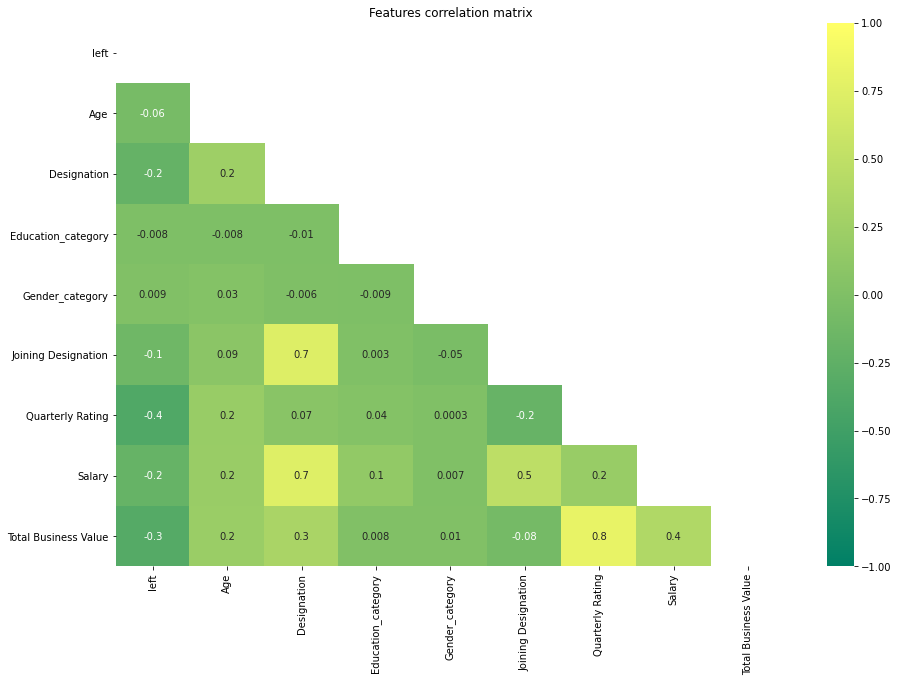

In [355]:
#changing heatmap shape to remove repeating values
matrix = np.triu(train_pivot.corr())

size = (15, 10)
fig, ax = plt.subplots(figsize=size)
fig=sns.heatmap(train_pivot.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, cmap= 'summer', mask=matrix)
plt.title('Features correlation matrix')
plt.show()

There is a positive correlation between:
- total business value and quarterly rating
- salary and designation/joining designation
- salary and total business value
- total business value and designation

There is a negative correlation between:
- most of the features and the fact of employer leaving 
- quarterly rating and joining designation



## How many entries are there per each month?

In [356]:
train['month'] = train['date'].astype('datetime64[M]')

train_month=train.pivot_table(index='month', values='Emp_ID', aggfunc='count')

train_month = train_month.reset_index()


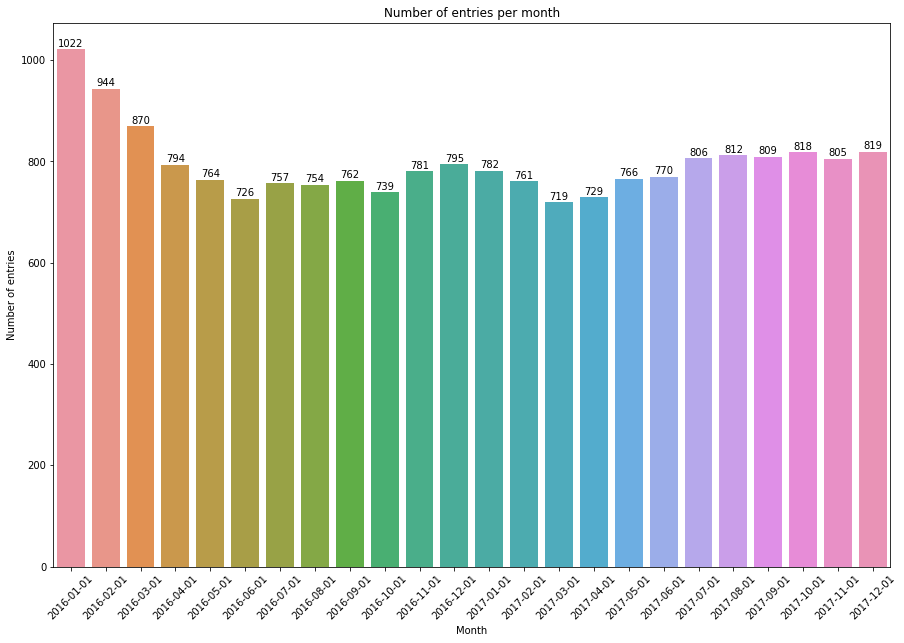

In [357]:
plt.figure(figsize=size)

fig = sns.barplot(data=train_month, x=train_month['month'].dt.date, y='Emp_ID' )
plt.title('Number of entries per month')
plt.xlabel('Month')
plt.ylabel('Number of entries')
plt.xticks(rotation=45)

for p in fig.patches:
    height = p.get_height()
    fig.text(x = p.get_x()+(p.get_width()/2), 
 y = height+5, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()

## Check hypotheses

### Is there statistically significant difference between employee's average `Quarterly rating` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [358]:
rating = (train.pivot_table(index=['Emp_ID', 'left'], values='Quarterly Rating', aggfunc='mean'))
rating=rating.reset_index()
rating.columns=['Emp_ID','left','Rating']
rating.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/pivot.py:128: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Emp_ID,left,Rating
0,1,True,2.0
1,2,False,1.0
2,4,True,1.0
3,5,True,1.0
4,6,False,1.6


#### Remove outliers (same result with and without outliers)

In [359]:
Q1 = rating['Rating'].quantile(0.25)
Q3 = rating['Rating'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3+1.5*IQR
round(upper_whisker,2)

3.5

In [360]:
rating=rating.query('Rating < @upper_whisker')


In [361]:

rating_left = rating.query('left == True')
rating_stayed = rating.query('left == False')

In [362]:
round(np.var(rating_left['Rating']),2)

0.3

In [363]:
round(np.var(rating_stayed['Rating']),2)

0.61

In [364]:
alpha=0.05
results = st.ttest_ind(rating_left['Rating'],rating_stayed['Rating'], equal_var=False)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Is there statistically significant difference between employee's average `Total business value` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [365]:
value = (train.pivot_table(index=['Emp_ID', 'left'], values='Total Business Value', aggfunc='mean'))
value=value.reset_index()
value.columns=['Emp_ID','left','Business_value']
value.head()

,Emp_ID,left,Business_value
0,1,True,571860.0
1,2,False,0.0
2,4,True,70000.0
3,5,True,40120.0
4,6,False,253000.0


#### Remove outliers (same result with and without outliers)

In [366]:
Q1 = value['Business_value'].quantile(0.25)
Q3 = value['Business_value'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3+1.5*IQR
round(upper_whisker,2)

1073746.88

In [367]:
value=value.query('Business_value < @upper_whisker')


In [368]:

value_left = value.query('left == True')
value_stayed = value.query('left == False')

In [369]:
round(np.var(value_left['Business_value']),2)

50821805804.6

In [370]:
round(np.var(value_stayed['Business_value']),2)

95667546369.0

In [371]:
alpha=0.05
results = st.ttest_ind(value_left['Business_value'],value_stayed['Business_value'], equal_var=False)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Is there statistically significant difference between employee's average `Salary` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [372]:
salary = (train.pivot_table(index=['Emp_ID', 'left'], values='Salary', aggfunc='mean'))
salary=salary.reset_index()
salary.head()

,Emp_ID,left,Salary
0,1,True,57387.0
1,2,False,67016.0
2,4,True,65603.0
3,5,True,46368.0
4,6,False,78728.0


#### Remove outliers (same result with and without outliers)

In [373]:
# Q1 = value['Business_value'].quantile(0.25)
# Q3 = value['Business_value'].quantile(0.75)
# IQR = Q3 - Q1
# upper_whisker = Q3+1.5*IQR
# round(upper_whisker,2)

In [374]:
# value=value.query('Business_value < @upper_whisker')


In [375]:
salary_left = salary.query('left == True')
salary_stayed = salary.query('left == False')

In [376]:
round(np.var(salary_left['Salary']),2)

723454058.99

In [377]:
round(np.var(salary_stayed['Salary']),2)

865446429.09

In [378]:
alpha=0.05
results = st.ttest_ind(salary_left['Salary'], salary_stayed['Salary'], equal_var=False)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Is there statistically significant difference between employee's average `Age` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [379]:
age = (train.pivot_table(index=['Emp_ID', 'left'], values='Age', aggfunc='mean'))
age=age.reset_index()


#### Remove outliers (same result with and without outliers)

In [380]:
# Q1 = value['Business_value'].quantile(0.25)
# Q3 = value['Business_value'].quantile(0.75)
# IQR = Q3 - Q1
# upper_whisker = Q3+1.5*IQR
# round(upper_whisker,2)

In [381]:
# value=value.query('Business_value < @upper_whisker')


In [382]:
age_left = age.query('left == True')
age_stayed = age.query('left == False')

In [383]:
round(np.var(age_left['Age']),2)

35.49

In [384]:
round(np.var(age_stayed['Age']),2)

32.55

In [385]:
alpha=0.05
results = st.ttest_ind(age_left['Age'], age_stayed['Age'], equal_var=False)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Is there statistically significant difference between employee's average `Designation` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [386]:
designation = (train.pivot_table(index=['Emp_ID', 'left'], values='Designation', aggfunc='mean'))
designation=designation.reset_index()


#### Remove outliers (same result with and without outliers)

In [387]:
# Q1 = value['Business_value'].quantile(0.25)
# Q3 = value['Business_value'].quantile(0.75)
# IQR = Q3 - Q1
# upper_whisker = Q3+1.5*IQR
# round(upper_whisker,2)

In [388]:
# value=value.query('Business_value < @upper_whisker')


In [389]:
designation_left = designation.query('left == True')
designation_stayed = designation.query('left == False')

In [390]:
round(np.var(designation_left['Designation']),2)

0.82

In [391]:
round(np.var(designation_stayed['Designation']),2)

0.87

In [392]:
alpha=0.05
results = st.ttest_ind(designation_left['Designation'], designation_stayed['Designation'])
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Is there statistically significant difference between employee's average `Joining Designation` for both groups?

- H0: There is no statistically significant difference
- H1: There is

In [393]:
designation = (train.pivot_table(index=['Emp_ID', 'left'], values='Joining Designation', aggfunc='mean'))
designation=designation.reset_index()
designation.columns= ['Emp_ID', 'left', 'joining_designation']


#### Remove outliers

In [394]:
Q1 = designation['joining_designation'].quantile(0.25)
Q3 = designation['joining_designation'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3+1.5*IQR
round(upper_whisker,2)

3.5

In [395]:
designation=designation.query('joining_designation < @upper_whisker')


In [396]:
designation_left = designation.query('left == True')
designation_stayed = designation.query('left == False')

In [397]:
round(np.var(designation_left['joining_designation']),2)

0.56

In [398]:
round(np.var(designation_stayed['joining_designation']),2)

0.65

In [399]:
alpha=0.05
results = st.ttest_ind(designation_left['joining_designation'], designation_stayed['joining_designation'], equal_var=False)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis
